In [0]:
import pandas as pd
import numpy as np

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [7]:
for fn in uploaded.keys():
  print('user uploaded file "{name}" with length "{length}" bytes'
  .format(name = fn, length = len(uploaded[fn])))

user uploaded file "titanic_train.csv" with length "60302" bytes


In [0]:
import io

In [0]:
train = pd.read_csv(io.StringIO(uploaded['titanic_train.csv'].decode('utf-8')))

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


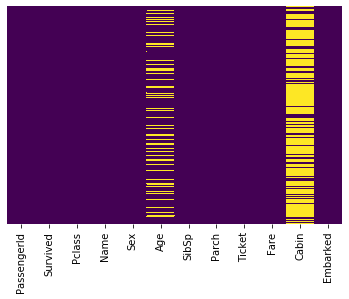

In [14]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [0]:
sns.set_style('whitegrid')

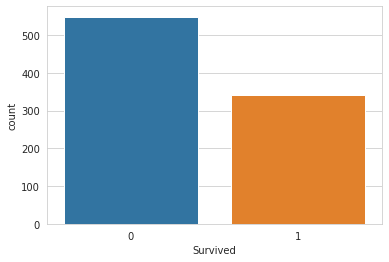

In [18]:
sns.countplot(x='Survived',data=train)

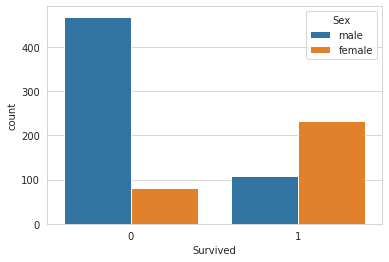

In [17]:
sns.countplot(x='Survived', hue='Sex', data=train)

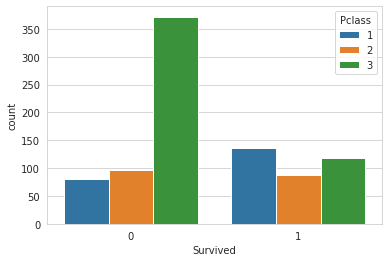

In [19]:
sns.countplot(x='Survived', hue='Pclass', data=train)

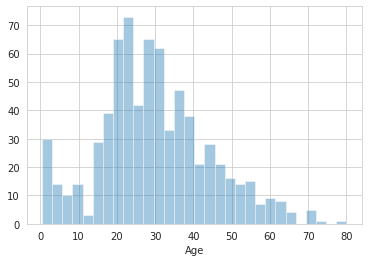

In [20]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

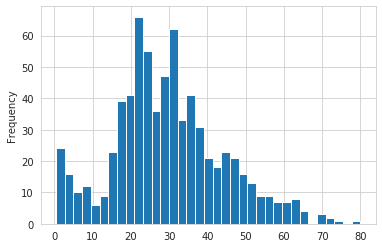

In [23]:
train['Age'].plot.hist(bins=35) 

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


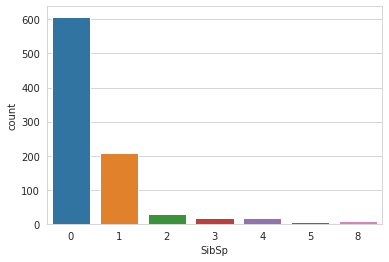

In [26]:
sns.countplot(x = 'SibSp', data = train)

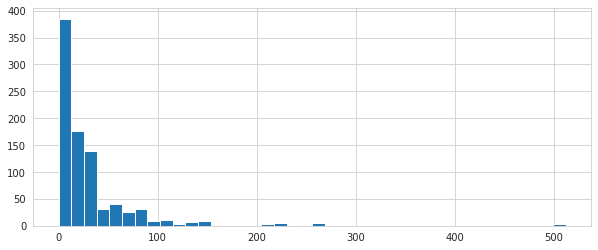

In [29]:
train['Fare'].hist(bins = 40, figsize = (10,4))

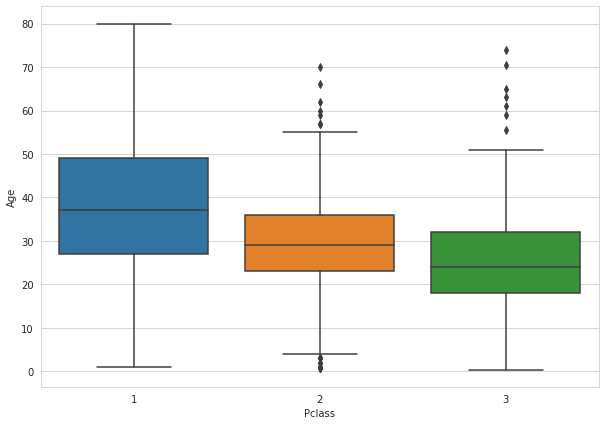

In [40]:
plt.figure(figsize = (10,7))
sns.boxplot(x= 'Pclass', y = 'Age', data = train)

In [0]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age

In [0]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

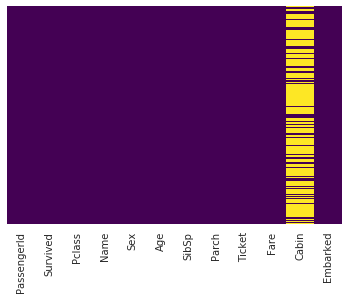

In [43]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [0]:
train.drop('Cabin', axis=1, inplace = True)

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


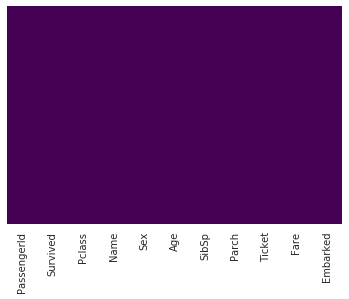

In [47]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [0]:
train.dropna(inplace = True)

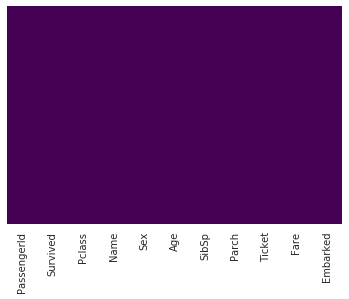

In [49]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [0]:
sex = pd.get_dummies(train['Sex'], drop_first = True)

In [54]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [0]:
embarked = pd.get_dummies(train['Embarked'], drop_first = True)

In [57]:
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [0]:
train = pd.concat([train,sex,embarked], axis = 1)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [0]:
train.drop(['Sex','Embarked','Name', 'Ticket'], axis = 1, inplace = True)

In [62]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [64]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [0]:
train.drop('PassengerId', axis = 1, inplace = True)

In [67]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [0]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logmodel = LogisticRegression()

In [75]:
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = logmodel.predict(X_test)

In [0]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [0]:
from sklearn.metrics import confusion_matrix

In [80]:
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 30,  74]])